# install dependencies

In [ ]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [ ]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 7.8150115724623150, performing 100.4 it/sec
Step 100: Loss = 0.5027483066609766, performing 180.1 it/sec
Step 200: Loss = 0.3070311027630301, performing 289.3 it/sec
Step 300: Loss = 0.1246189053549019, performing 249.3 it/sec
Step 400: Loss = 0.0074833903046250, performing 317.6 it/sec
No improvement since Step 376, early stopping.
[Best]  Step 375: Loss = 0.0066224928105325
[Final] Step 425: Loss = 0.0088725227156210

predicted end states
------------------------------------
         5th       Mean      95th
LCDL-1  1.09e-08  1.10e-08  1.12e-08
LCDL-2  9.73e-12  9.86e-12  1.00e-11
LCDL-3  9.74e-12  9.88e-12  1.00e-11
LCDL-4  9.73e-12  9.86e-12  9.99e-12
LCDL-0  1.00e+00  1.00e+00  1.00e+00


predicted conditional events
----------------------------------
       5th       Mean      95th
LCDL  1.09e-08  1.11e-08  1.12e-08
PKRU  8.9

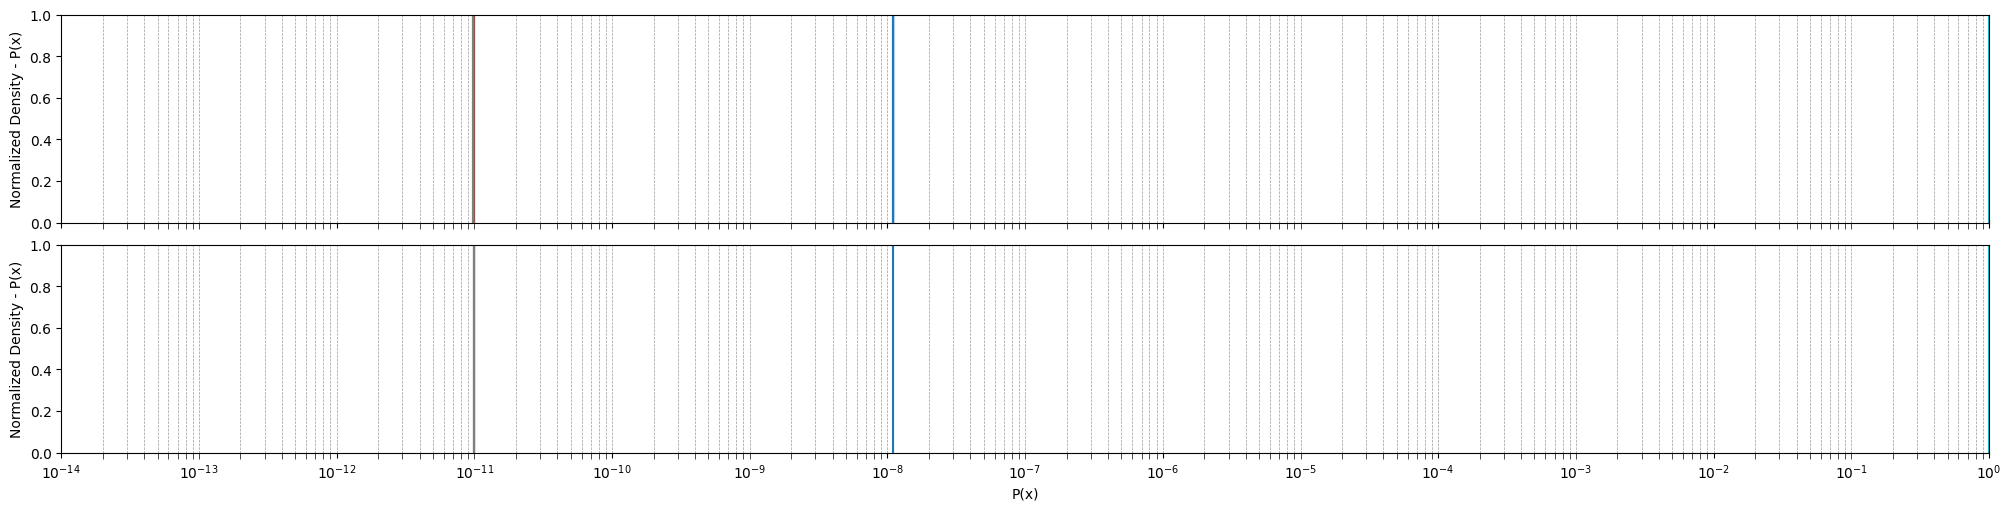

In [ ]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
}

conditional_events = {
    'names': ['LCDL', 'PKRU', 'DHRS', 'DHRL'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'LCDL-1': {
        'sequence': [1, 0, 0, 0],
        'probability': 1.1e-8,
    },
    'LCDL-2': {
        'sequence': [1, 0, 0, 1],
        'probability': 1.00e-11,
    },
    'LCDL-3': {
        'sequence': [1, 0, 1, np.nan],
        'probability': 1.00e-11,
    },
    'LCDL-4': {
        'sequence': [1, 1, np.nan, np.nan],
        'probability': 1.00e-11,
    },
    'LCDL-0': {
        'sequence': [0, np.nan, np.nan, np.nan],
        'probability': 1.0 - 1.1e-8 - 1.00e-11 - 1.00e-11 - 1.00e-11, # one minus all the other end-states
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)